In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv("/kaggle/input/flight-price-prediction/Clean_Dataset.csv", nrows=50000)
df.drop(columns=["Unnamed: 0"], inplace=True)


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           50000 non-null  object 
 1   flight            50000 non-null  object 
 2   source_city       50000 non-null  object 
 3   departure_time    50000 non-null  object 
 4   stops             50000 non-null  object 
 5   arrival_time      50000 non-null  object 
 6   destination_city  50000 non-null  object 
 7   class             50000 non-null  object 
 8   duration          50000 non-null  float64
 9   days_left         50000 non-null  int64  
 10  price             50000 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 4.2+ MB
None

Missing values:
 airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
d

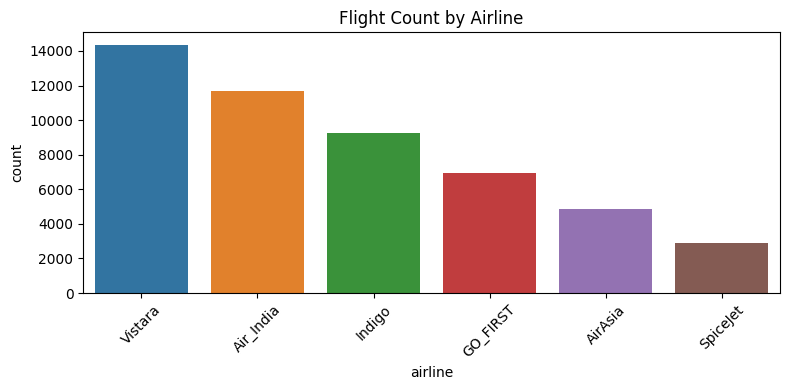

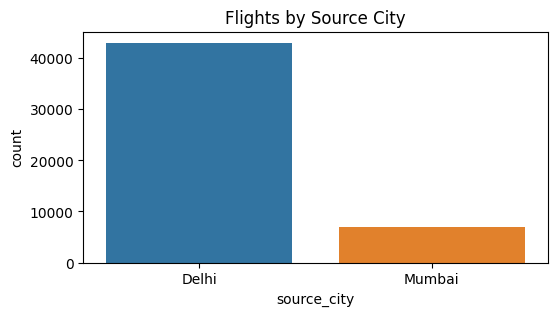

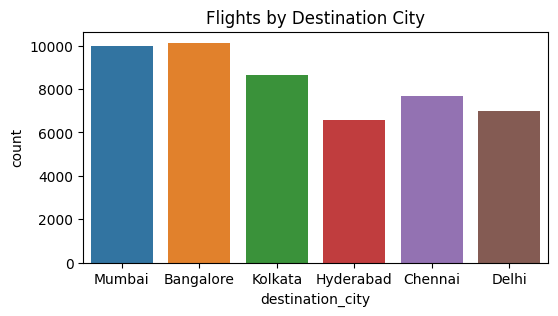

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


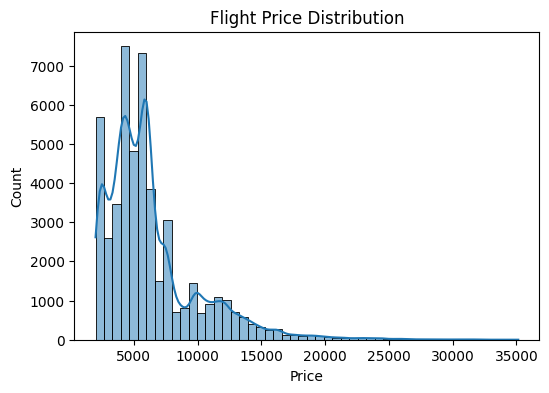

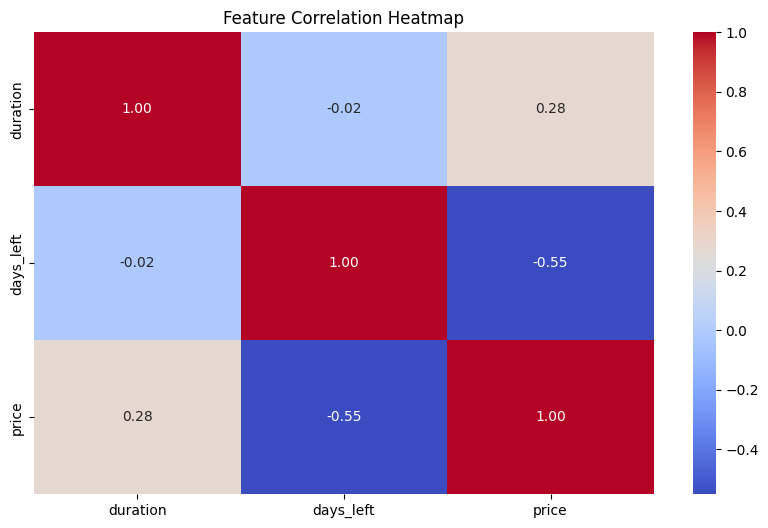

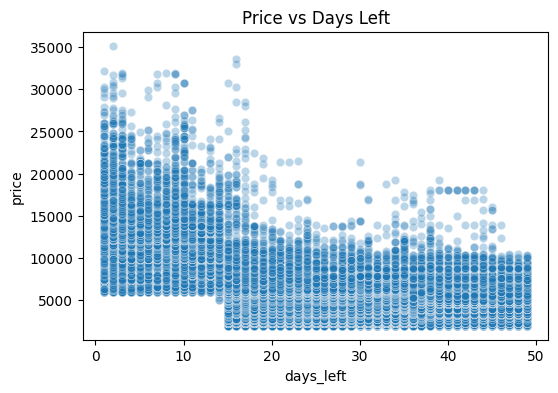

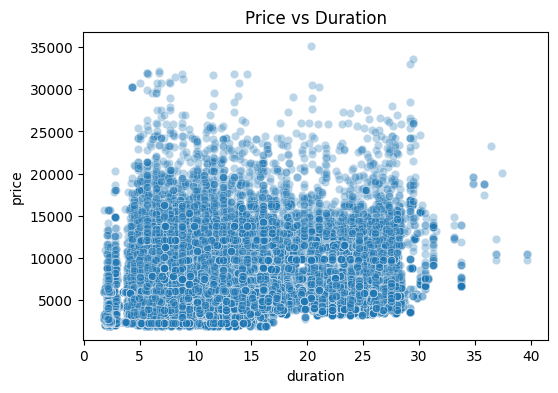

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Show data types and missing values
print("Dataset Overview:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# ✈️ Airline distribution
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='airline', order=df['airline'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Flight Count by Airline")
plt.tight_layout()
plt.show()

# 📍 Source and Destination cities
plt.figure(figsize=(6,3))
sns.countplot(data=df, x='source_city')
plt.title("Flights by Source City")
plt.show()

plt.figure(figsize=(6,3))
sns.countplot(data=df, x='destination_city')
plt.title("Flights by Destination City")
plt.show()

# 💰 Price distribution
plt.figure(figsize=(6,4))
sns.histplot(df['price'], kde=True, bins=50)
plt.title("Flight Price Distribution")
plt.xlabel("Price")
plt.show()

# 📉 Correlation heatmap (numerical only)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

# 🎯 Price vs Days Left
plt.figure(figsize=(6,4))
sns.scatterplot(x='days_left', y='price', data=df, alpha=0.3)
plt.title("Price vs Days Left")
plt.show()

# 🕒 Price vs Duration
plt.figure(figsize=(6,4))
sns.scatterplot(x='duration', y='price', data=df, alpha=0.3)
plt.title("Price vs Duration")
plt.show()


In [4]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


In [5]:
X = df.drop("price", axis=1)
y = df["price"]


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)


In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))


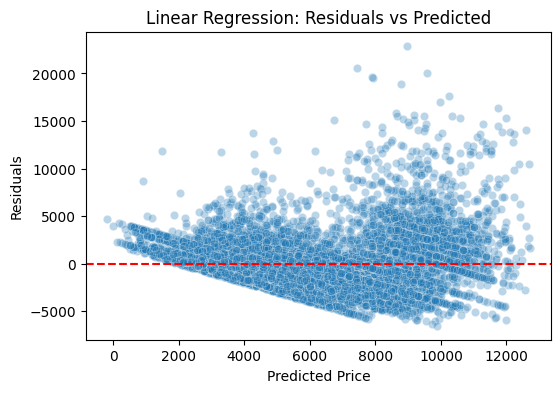

In [9]:
residuals = y_test - lr_pred
plt.figure(figsize=(6, 4))
sns.scatterplot(x=lr_pred, y=residuals, alpha=0.3)
plt.axhline(0, linestyle='--', color='red')
plt.title("Linear Regression: Residuals vs Predicted")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.show()


In [10]:
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, {'alpha': [0.1, 1, 10]}, cv=5)
ridge_grid.fit(X_train, y_train)
ridge_pred = ridge_grid.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))


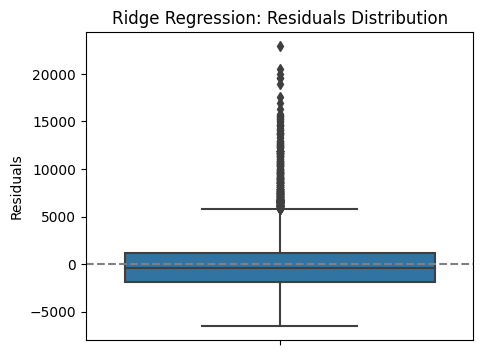

In [11]:
ridge_residuals = y_test - ridge_pred
plt.figure(figsize=(5, 4))
sns.boxplot(y=ridge_residuals)
plt.title("Ridge Regression: Residuals Distribution")
plt.ylabel("Residuals")
plt.axhline(0, linestyle='--', color='gray')
plt.show()


In [12]:
lasso = Lasso(max_iter=10000)
lasso_grid = GridSearchCV(lasso, {'alpha': [0.01, 0.1, 1.0]}, cv=5)
lasso_grid.fit(X_train, y_train)
lasso_pred = lasso_grid.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))


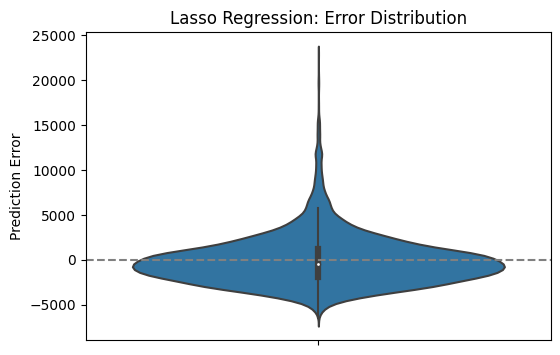

In [13]:
lasso_error = y_test - lasso_pred
plt.figure(figsize=(6, 4))
sns.violinplot(y=lasso_error, inner='box')
plt.title("Lasso Regression: Error Distribution")
plt.ylabel("Prediction Error")
plt.axhline(0, linestyle='--', color='gray')
plt.show()


In [14]:
X_small, _, y_small, _ = train_test_split(X_scaled, y, train_size=10000, random_state=42)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_small)
X_poly_test = poly.transform(X_test[:10000])
y_small_test = y_test[:10000]

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_small)
poly_pred = poly_model.predict(X_poly_test)
poly_rmse = np.sqrt(mean_squared_error(y_small_test, poly_pred))


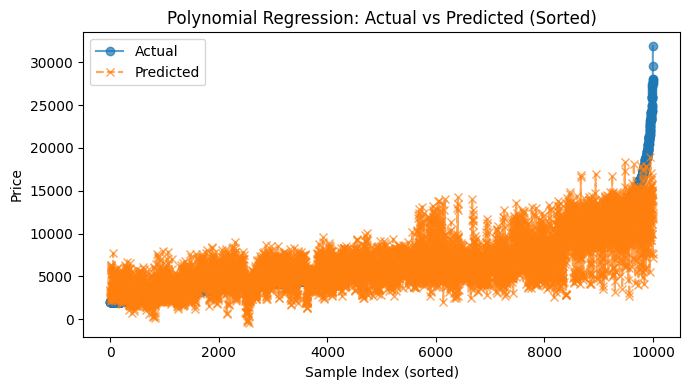

In [15]:
sorted_indices = np.argsort(y_small_test.values)
plt.figure(figsize=(7, 4))
plt.plot(y_small_test.values[sorted_indices], label='Actual', linestyle='-', marker='o', alpha=0.7)
plt.plot(poly_pred[sorted_indices], label='Predicted', linestyle='--', marker='x', alpha=0.7)
plt.title("Polynomial Regression: Actual vs Predicted (Sorted)")
plt.xlabel("Sample Index (sorted)")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


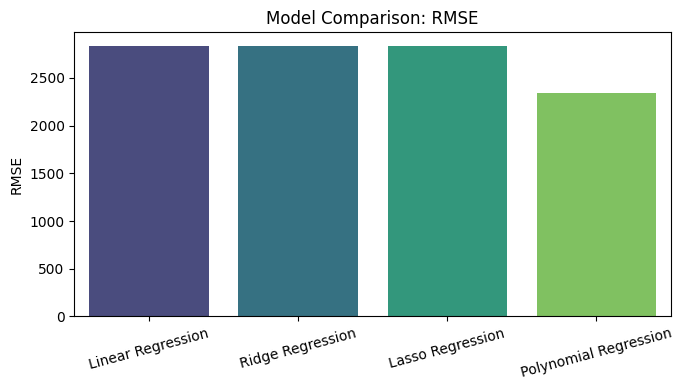

In [16]:
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Polynomial Regression']
rmses = [lr_rmse, ridge_rmse, lasso_rmse, poly_rmse]

plt.figure(figsize=(7, 4))
sns.barplot(x=models, y=rmses, palette='viridis')
plt.ylabel("RMSE")
plt.title("Model Comparison: RMSE")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [17]:
print("\n📊 Model RMSE Scores:")
for name, score in zip(models, rmses):
    print(f"{name:25}: {score:.2f}")



📊 Model RMSE Scores:
Linear Regression        : 2836.43
Ridge Regression         : 2836.43
Lasso Regression         : 2836.43
Polynomial Regression    : 2339.18
